## <center> Assignment 01
## <center> Course: ML1    
## <center> Instructor: Dr. Tariq Mahmood

### <center> Submitted By:
#### <center> Muhammad Uzair 29414
#### <center> Areeb Asif 14101

https://github.com/muhammaduzair99/ML-1.git

#### <center> 
#### <center> Estimation of obesity levels based on eating habits and physical condition
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition



This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.



| Variable Name                  | Role    | Type       | Demographic | Description                                                     | Units | Missing Values |
|--------------------------------|---------|------------|-------------|-----------------------------------------------------------------|-------|----------------|
| Gender                         | Feature | Categorical| Gender      |                                                                 |       | no             |
| Age                            | Feature | Continuous | Age         |                                                                 |       | no             |
| Height                         | Feature | Continuous |             |                                                                 |       | no             |
| Weight                         | Feature | Continuous |             |                                                                 |       | no             |
| family_history_with_overweight | Feature | Binary     |             | Has a family member suffered or suffers from overweight?       |       | no             |
| FAVC                           | Feature | Binary     |             | Do you eat high caloric food frequently?                       |       | no             |
| FCVC                           | Feature | Integer    |             | Do you usually eat vegetables in your meals?                   |       | no             |
| NCP                            | Feature | Continuous |             | How many main meals do you have daily?                         |       | no             |
| CAEC                           | Feature | Categorical|             | Do you eat any food between meals?                             |       | no             |
| SMOKE                          | Feature | Binary     |             | Do you smoke?                                                   |       | no             |
| CH2O                           | Feature | Continuous |             | How much water do you drink daily?                             |       | no             |
| SCC                            | Feature | Binary     |             | Do you monitor the calories you eat daily?                     |       | no             |
| FAF                            | Feature | Continuous |             | How often do you have physical activity?                       |       | no             |
| TUE                            | Feature | Integer    |             | How much time do you use technological devices?               |       | no             |
| CALC                           | Feature | Categorical|             | How often do you drink alcohol?                                |       | no             |
| MTRANS                         | Feature | Categorical|             | Which transportation do you usually use?                       |       | no             |
| NObeyesdad                     | Target  | Categorical|             | Obesity level                                                   |       | no             |


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder


In [2]:
# file path
filepath = 'obesitydataset.csv'
target = 'NObeyesdad'

In [3]:

def load_data(filepath):
    df = pd.read_csv(filepath)
    return df

def clean_data(df):
    df_cleaned = df.dropna()
    return df_cleaned

def transform_data(df):
    scaler = StandardScaler()
    numerical_cols = df.select_dtypes(include=['float64']).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

def transform_data1(df):
    binary_categorical_cols = []
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].nunique() == 2:
            binary_categorical_cols.append(col)

    for col in binary_categorical_cols:
        df[col] = df[col].map({'yes': True, 'no': False, 'Male': True, 'Female': False})
        
    return df

def eda(df):
    summary_stats = df.describe()
    float_cols = df.select_dtypes(include=['float64']).columns
    
    num_cols = len(float_cols)
    num_rows = (num_cols + 2) // 3
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(float_cols):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(float_cols):
        plt.subplot(num_rows, 3, i+1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


def manual_split(df, target_column):
    if isinstance(target_column, list):
        target_column = target_column[0]
    
    # One-hot encoding for categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    # Check if the target column is in the list of categorical columns
    if target_column in categorical_cols:
        # Remove the target column from the list of categorical columns
        categorical_cols.remove(target_column)
    else:
        print(f"Target column '{target_column}' is not found in the DataFrame's categorical columns.")
    
    # Perform one-hot encoding excluding the target column
    df = pd.get_dummies(df, columns=categorical_cols)

    # Label encoding for the target variable
    label_encoder = LabelEncoder()
    df[target_column] = label_encoder.fit_transform(df[target_column])

    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=[target_column]),
        df[target_column],
        test_size=0.2,
        random_state=42
    )
    return X_train, X_test, y_train, y_test
    

def model_selection():
    model = KNeighborsClassifier()
    return model
    
def cv_scores(model,X_train, y_train):  
    # Example: KNN Classifier
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores
    
def train_model(model,X_train,y_train):
    model.fit(X_train, y_train)

def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    if len(np.unique(y_test)) > 2:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    if len(np.unique(y_test)) > 2:
        n_classes = len(np.unique(y_test))
        fpr = dict()
        tpr = dict()
        roc_auc_dict = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
            roc_auc_dict[i] = auc(fpr[i], tpr[i])

            plt.figure()
            plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (class {})'.format(i))
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('Receiver Operating Characteristic (ROC) Curve - Class {}'.format(i))
            plt.legend(loc="lower right")
            plt.show()
    else:
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy}")
    print("\nClassification Report:")
    print(classification_rep)
    print("\nROC AUC Score:")
    print(roc_auc)



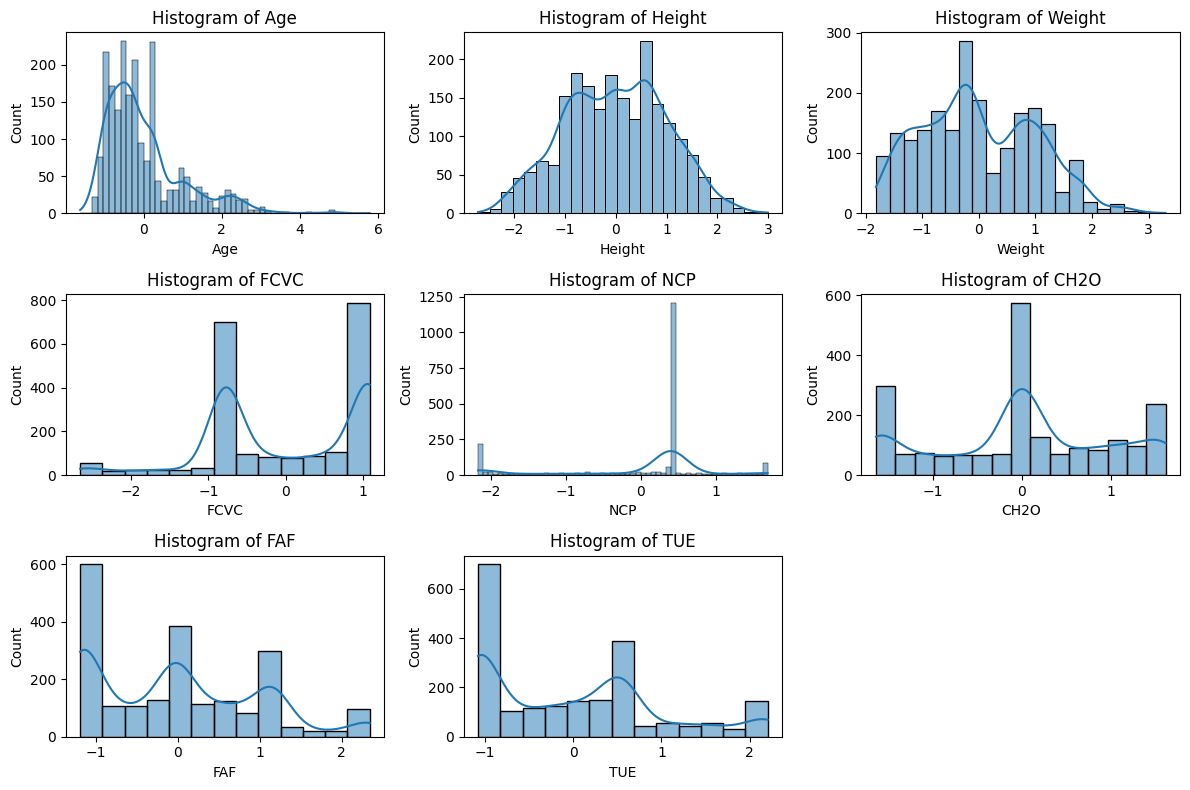

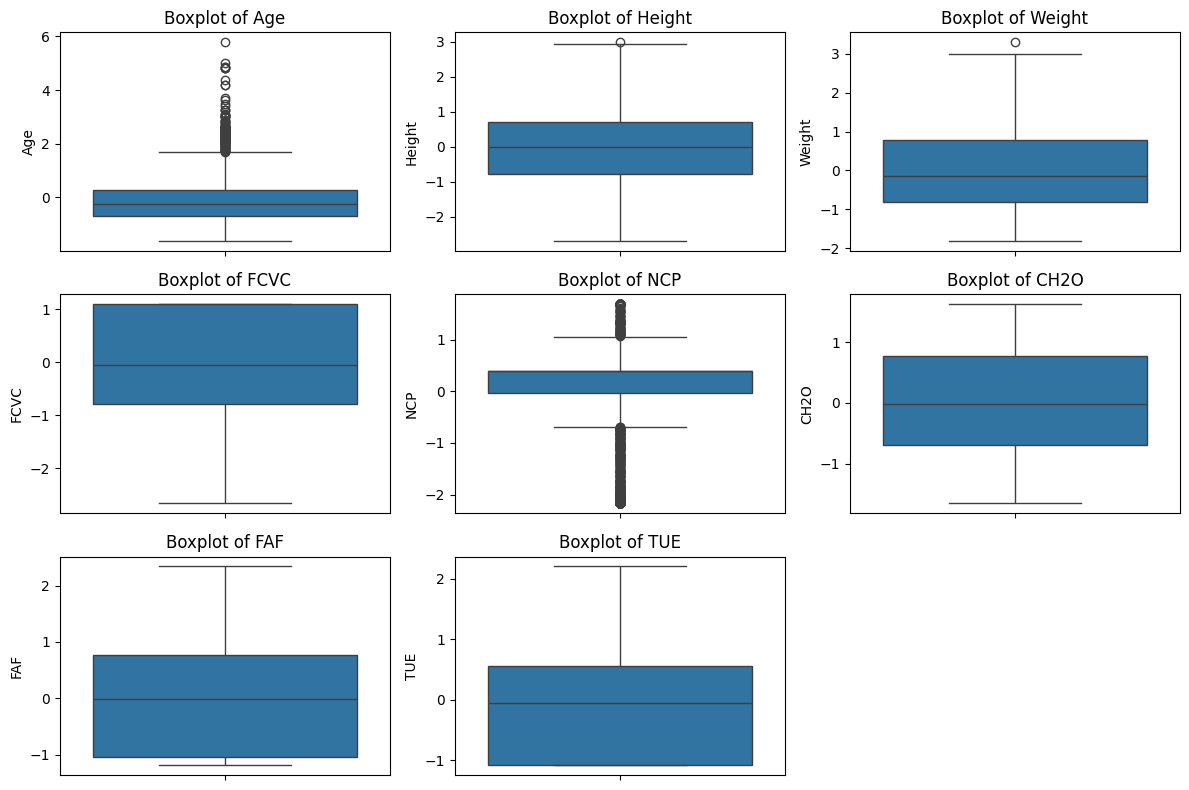

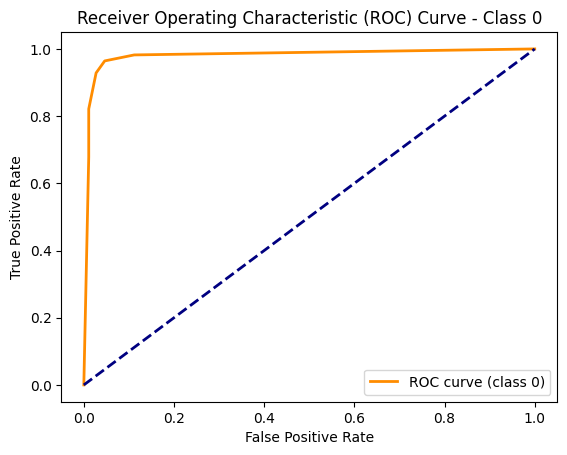

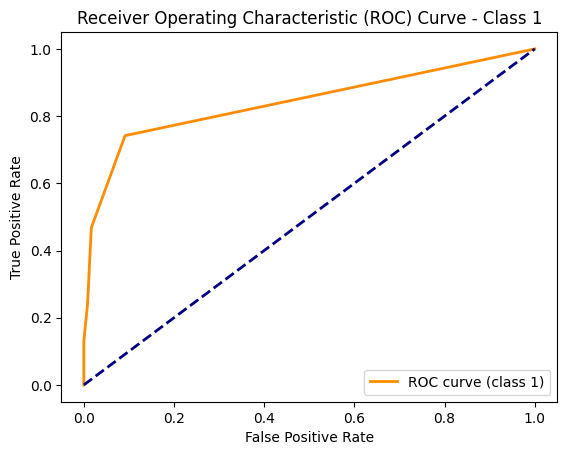

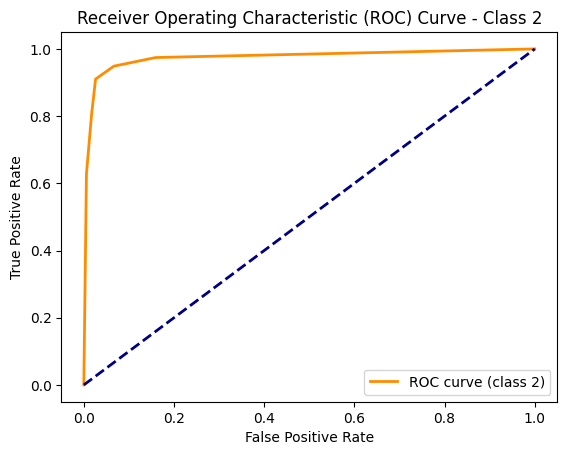

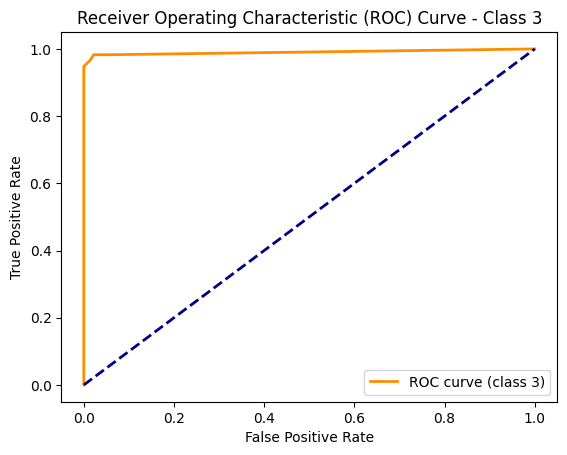

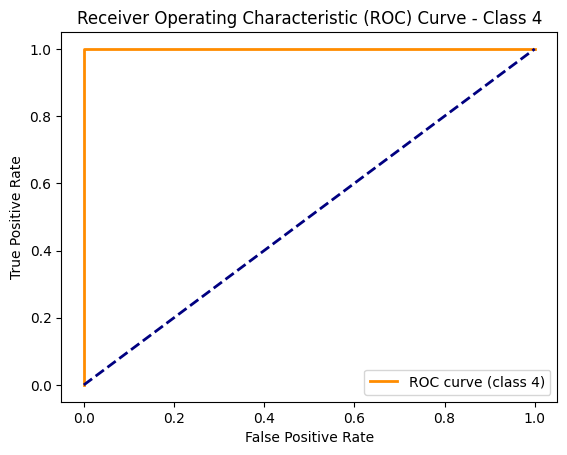

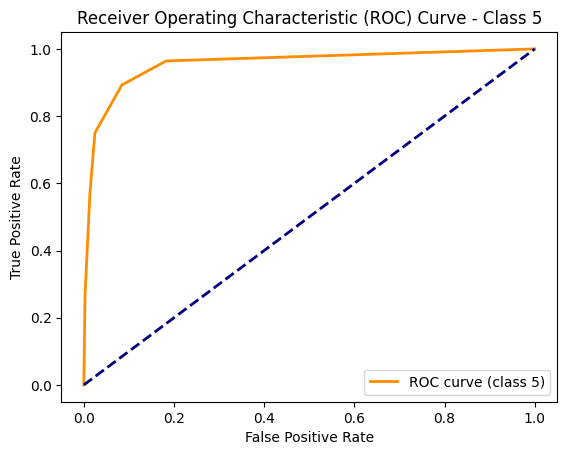

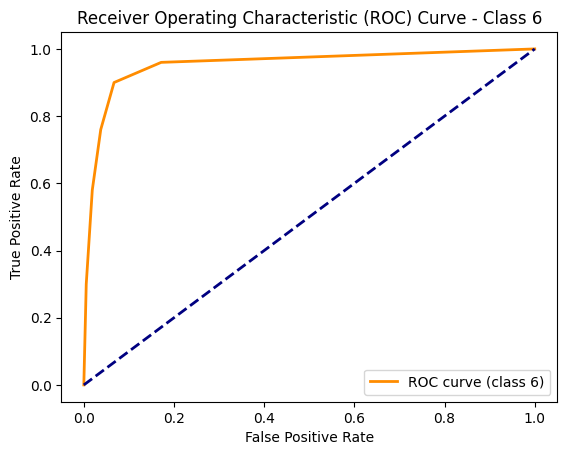


Evaluation Metrics:
Accuracy: 0.8321513002364066

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.85        56
           1       0.85      0.37      0.52        62
           2       0.84      0.94      0.88        78
           3       0.90      0.97      0.93        58
           4       0.98      1.00      0.99        63
           5       0.74      0.82      0.78        56
           6       0.72      0.76      0.74        50

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.81       423
weighted avg       0.84      0.83      0.82       423


ROC AUC Score:
0.9562907077949446


In [4]:
# def master_pipeline(filepath, target_column):
#     print("Target Column:", target_column)
#     # rest of the code...

def master_pipeline(filepath,target):
    df = load_data(filepath)
    df = clean_data(df)
    df = transform_data(df)
    df = transform_data1(df)
    eda(df)
    X_train, X_test, y_train, y_test = manual_split(df, target)
    model = model_selection()
    cv_scores(model,X_train, y_train)
    train_model(model, X_train, y_train)
    evaluate_model(model, X_test, y_test)

# Example usage:
master_pipeline(filepath,target)


The evaluation metrics for the KNN classifier are as follows:

Accuracy: The accuracy of the classifier is 83.22%, indicating that it correctly predicts the class label for approximately 83.22% of the instances in the test set.

Precision: Precision measures the proportion of true positive predictions among all positive predictions. Precision varies for each class. For example, for class 0, the precision is 0.78, indicating that 78% of the instances predicted as class 0 are actually class 0. Similarly, precision values are provided for other classes.

Recall: Recall, also known as sensitivity, measures the proportion of true positive predictions among all actual positive instances. Recall varies for each class as well. For example, for class 0, the recall is 0.95, indicating that 95% of all actual class 0 instances are correctly predicted as class 0. Similarly, recall values are provided for other classes.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Like precision and recall, the F1-score varies for each class. For example, for class 0, the F1-score is 0.85, indicating a good balance between precision and recall for class 0. Similarly, F1-scores are provided for other classes.

ROC AUC Score: The ROC AUC score is 0.956, which indicates that the classifier performs very well in distinguishing between the classes. A score closer to 1.0 suggests better performance.

Overall, the KNN classifier demonstrates strong performance across multiple evaluation metrics. However, it's important to note that the performance varies across different classes, with some classes having higher precision, recall, and F1-scores than others. This suggests that the classifier may be better at predicting certain classes than others, and further analysis may be needed to understand the reasons behind these differences and potentially improve the model's performance on specific classes.